# Analyzing Michael Jordan Stats

In [5]:
# Data and NBA API
# !pip install nba_api

import pandas as pd
import numpy as np

from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
# from nba_api.stats.endpoints import fantasywidget
# from nba_api.stats.endpoints import commonallplayers
from nba_api.stats.endpoints import playergamelog

pd.set_option('display.max_column', None)

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
#Created an Object Player to attach different methods too

class Player:
    def __init__(self, playerName):
        nba_players = players.get_players()
        player_info =  pd.json_normalize(nba_players) 
        player_info = player_info[player_info['full_name'] == playerName]

        self.player_id = player_info['id']
        self.full_name = player_info['full_name']
        self.first_name = player_info['first_name']
        self.last_name = player_info['last_name']
        self.is_active = player_info['is_active']
    
    def getPlayersStats(self, season=False):
        stats = playercareerstats.PlayerCareerStats(player_id=self.player_id)
        stats_df = stats.get_data_frames()[0]
        if season:
            stats_df1 = stats_df[stats_df['SEASON_ID'] == season]
            return stats_df1
        else:
            return stats_df
    
    def getPlayerGameLog(self, season=''):
        game_df = playergamelog.PlayerGameLog(player_id=self.player_id)
        game_df = game_df.get_data_frames()[0]

        return game_df

In [7]:
mj = Player('Michael Jordan')
mj_stats = mj.getPlayersStats()
mj_stats.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,893,1984-85,00,1610612741,CHI,22.0,82,82,3144.0,837,1625,0.515,9,52,0.173,630,746,0.845,167,367,534,481,196,69,291,285,2313
1,893,1985-86,00,1610612741,CHI,23.0,18,7,451.0,150,328,0.457,3,18,0.167,105,125,0.840,23,41,64,53,37,21,45,46,408
2,893,1986-87,00,1610612741,CHI,24.0,82,82,3281.0,1098,2279,0.482,12,66,0.182,833,972,0.857,166,264,430,377,236,125,272,237,3041
3,893,1987-88,00,1610612741,CHI,25.0,82,82,3311.0,1069,1998,0.535,7,53,0.132,723,860,0.841,139,310,449,485,259,131,252,270,2868
4,893,1988-89,00,1610612741,CHI,26.0,81,81,3255.0,966,1795,0.538,27,98,0.276,674,793,0.850,149,503,652,650,234,65,290,247,2633


In [8]:
mj_stats.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [9]:
mj_stats.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 27 entries, PLAYER_ID to PTS
dtypes: float64(5), int64(19), object(3)
memory usage: 3.3+ KB


In [10]:
mj_stats.index

RangeIndex(start=0, stop=15, step=1)

In [11]:
mj_stats = mj_stats[['SEASON_ID','TEAM_ABBREVIATION','PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS']]

mj_stats.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1984-85,CHI,22.0,82,82,3144.0,837,1625,0.515,9,52,0.173,630,746,0.845,167,367,534,481,196,69,291,285,2313
1,1985-86,CHI,23.0,18,7,451.0,150,328,0.457,3,18,0.167,105,125,0.840,23,41,64,53,37,21,45,46,408
2,1986-87,CHI,24.0,82,82,3281.0,1098,2279,0.482,12,66,0.182,833,972,0.857,166,264,430,377,236,125,272,237,3041
3,1987-88,CHI,25.0,82,82,3311.0,1069,1998,0.535,7,53,0.132,723,860,0.841,139,310,449,485,259,131,252,270,2868
4,1988-89,CHI,26.0,81,81,3255.0,966,1795,0.538,27,98,0.276,674,793,0.850,149,503,652,650,234,65,290,247,2633


In [12]:
mj_stats.set_index('SEASON_ID', inplace=True)
mj_stats.index.name = None

In [13]:
mj_stats.head()

,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
1984-85,CHI,22.0,82,82,3144.0,837,1625,0.515,9,52,0.173,630,746,0.845,167,367,534,481,196,69,291,285,2313
1985-86,CHI,23.0,18,7,451.0,150,328,0.457,3,18,0.167,105,125,0.840,23,41,64,53,37,21,45,46,408
1986-87,CHI,24.0,82,82,3281.0,1098,2279,0.482,12,66,0.182,833,972,0.857,166,264,430,377,236,125,272,237,3041
1987-88,CHI,25.0,82,82,3311.0,1069,1998,0.535,7,53,0.132,723,860,0.841,139,310,449,485,259,131,252,270,2868
1988-89,CHI,26.0,81,81,3255.0,966,1795,0.538,27,98,0.276,674,793,0.850,149,503,652,650,234,65,290,247,2633


In [14]:
mj_stats.rename(columns={'TEAM_ABBREVIATION':'TEAM', 'PLAYER_AGE':'AGE'}, inplace=True)

In [15]:
mj_stats.head()

,TEAM,AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
1984-85,CHI,22.0,82,82,3144.0,837,1625,0.515,9,52,0.173,630,746,0.845,167,367,534,481,196,69,291,285,2313
1985-86,CHI,23.0,18,7,451.0,150,328,0.457,3,18,0.167,105,125,0.840,23,41,64,53,37,21,45,46,408
1986-87,CHI,24.0,82,82,3281.0,1098,2279,0.482,12,66,0.182,833,972,0.857,166,264,430,377,236,125,272,237,3041
1987-88,CHI,25.0,82,82,3311.0,1069,1998,0.535,7,53,0.132,723,860,0.841,139,310,449,485,259,131,252,270,2868
1988-89,CHI,26.0,81,81,3255.0,966,1795,0.538,27,98,0.276,674,793,0.850,149,503,652,650,234,65,290,247,2633


In [16]:
mjPTS = mj_stats[['PTS']]

In [17]:
mjPTS

,PTS
1984-85,2313
1985-86,408
1986-87,3041
1987-88,2868
1988-89,2633
1989-90,2753
1990-91,2580
1991-92,2404
1992-93,2541
1994-95,457


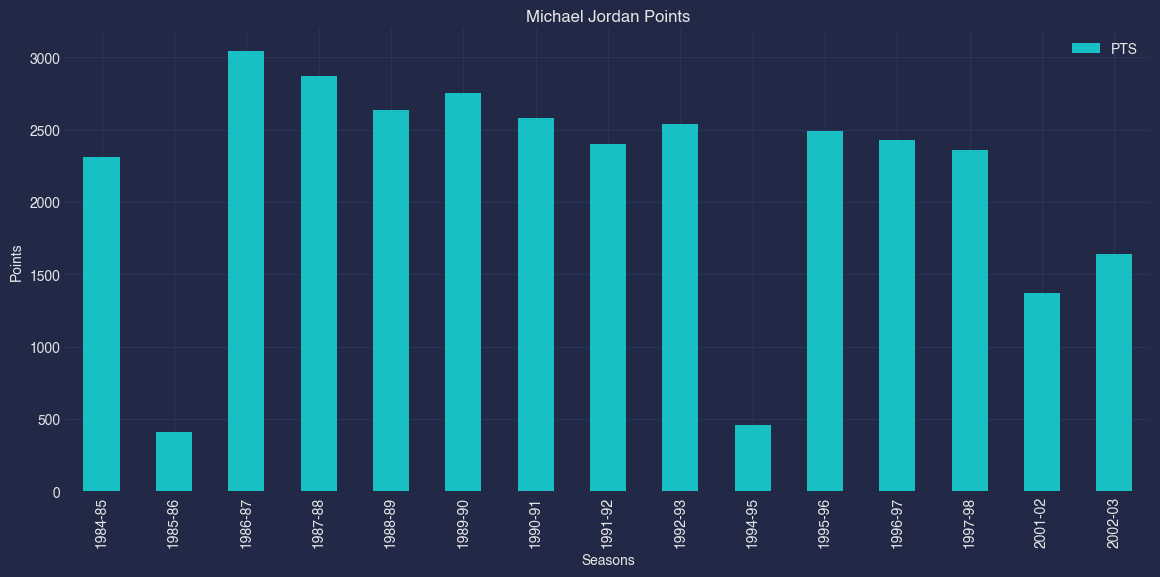

In [18]:
mjPTS.plot(kind='bar', figsize=(14,6))

plt.title('Michael Jordan Points')
plt.ylabel('Points')
plt.xlabel('Seasons')

plt.show()

In [19]:
mjAST = mj_stats['AST']
mjAST

1984-85    481
1985-86     53
1986-87    377
1987-88    485
1988-89    650
1989-90    519
1990-91    453
1991-92    489
1992-93    428
1994-95     90
1995-96    352
1996-97    352
1997-98    283
2001-02    310
2002-03    311
Name: AST, dtype: int64

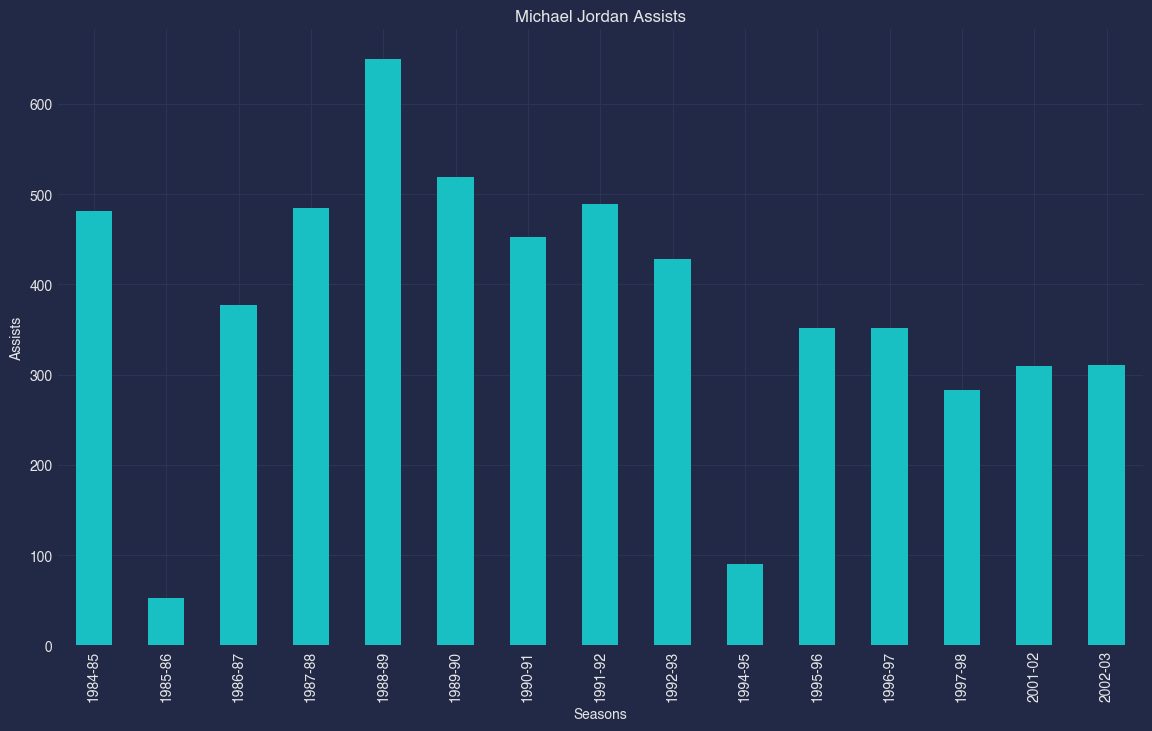

In [20]:
mjAST.plot(kind='bar', figsize=(14,8))

plt.title('Michael Jordan Assists')
plt.ylabel('Assists')
plt.xlabel('Seasons')

plt.show()

In [21]:
mjFG = mj_stats[['FG_PCT', 'FG3_PCT', 'FT_PCT']]
mjFG

,FG_PCT,FG3_PCT,FT_PCT
1984-85,0.515,0.173,0.845
1985-86,0.457,0.167,0.840
1986-87,0.482,0.182,0.857
1987-88,0.535,0.132,0.841
1988-89,0.538,0.276,0.850
1989-90,0.526,0.376,0.848
1990-91,0.539,0.312,0.851
1991-92,0.519,0.270,0.832
1992-93,0.495,0.352,0.837
1994-95,0.411,0.500,0.801


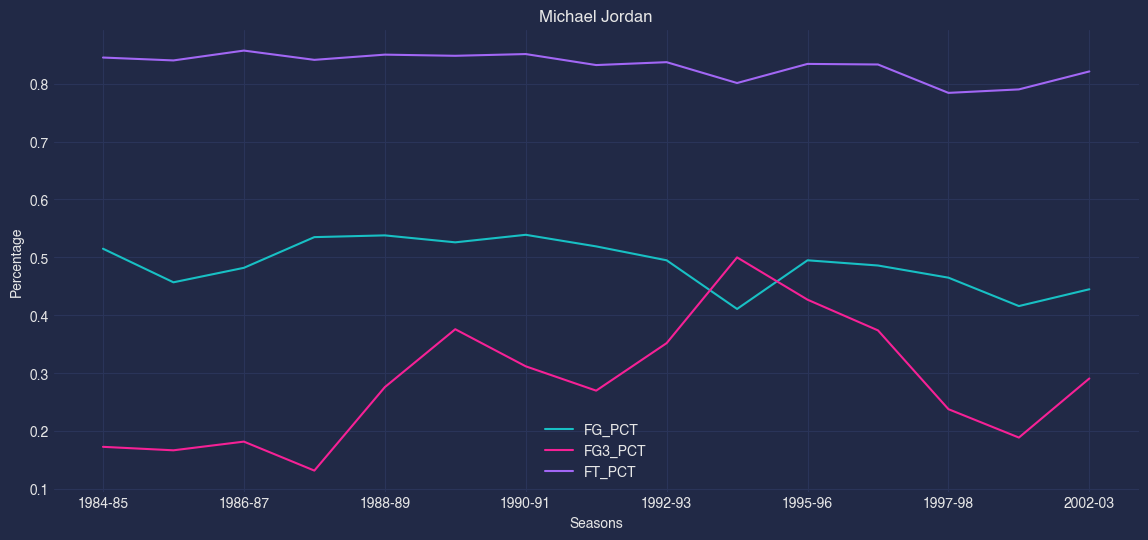

In [22]:
mjFG.plot(kind='line', figsize=(14,6))

plt.title('Michael Jordan')
plt.ylabel('Percentage')
plt.xlabel('Seasons')

plt.show()

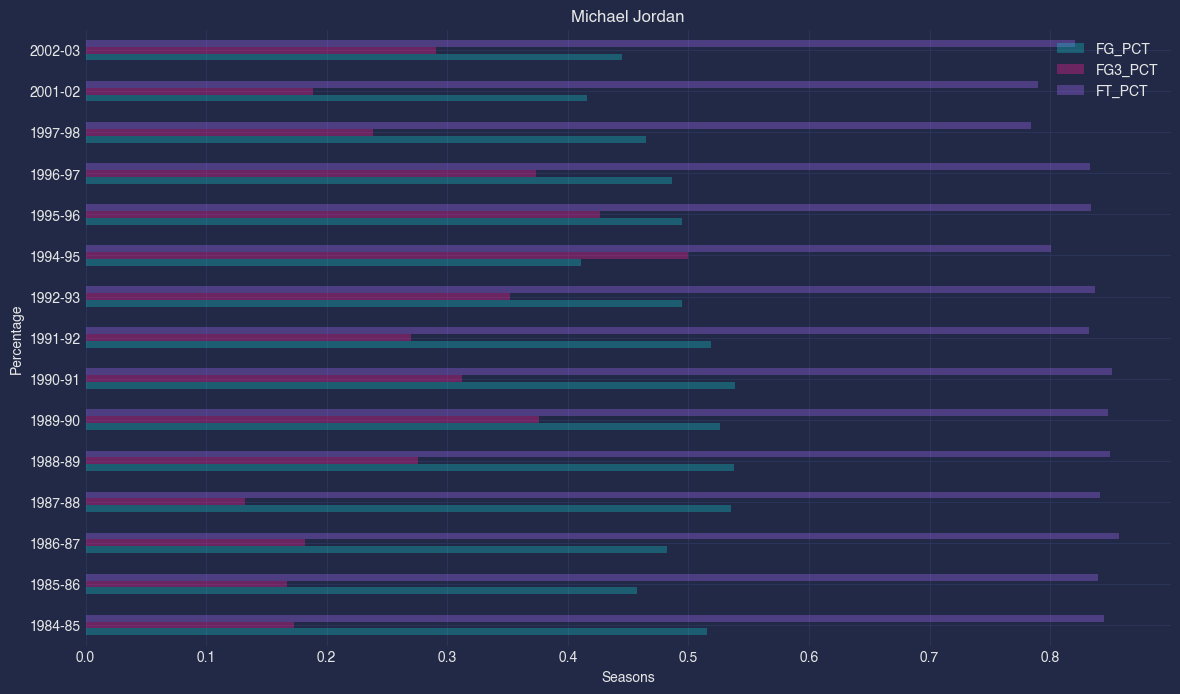

In [23]:
mjFG.plot(kind='barh', figsize=(14,8), alpha=0.35)

plt.title('Michael Jordan')
plt.ylabel('Percentage')
plt.xlabel('Seasons')

plt.show()

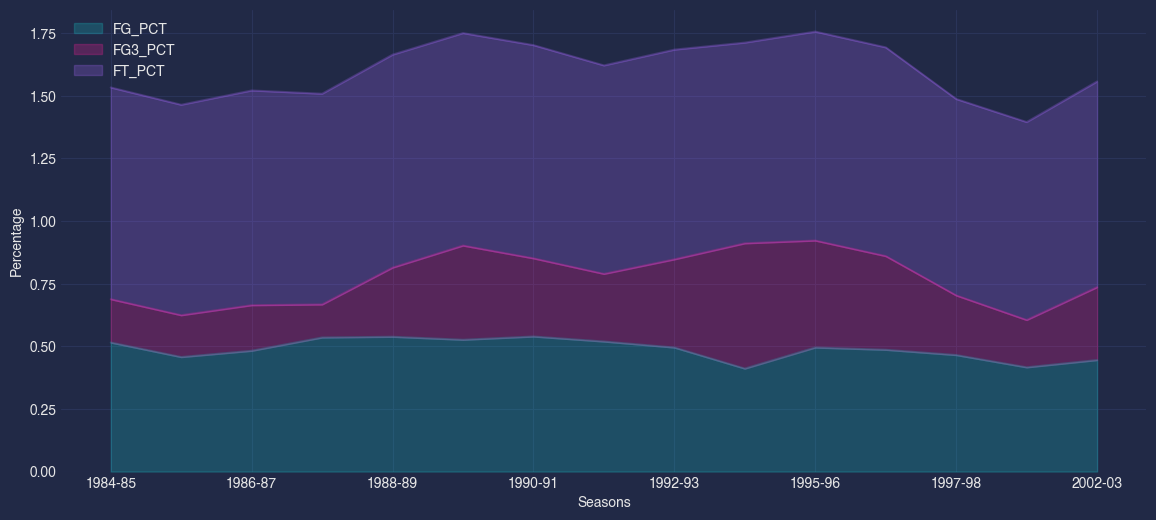

In [24]:
mjFG.plot(kind='area', figsize=(14,6), alpha=0.25)
plt.ylabel('Percentage')
plt.xlabel('Seasons')

plt.show()

<Axes: ylabel='Frequency'>

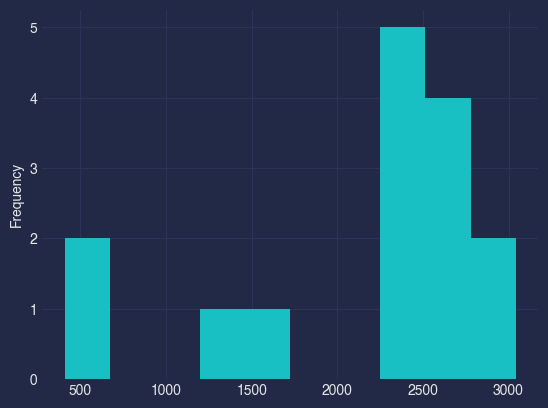

In [25]:
mj_stats['PTS'].plot(kind='hist')

<Axes: ylabel='Frequency'>

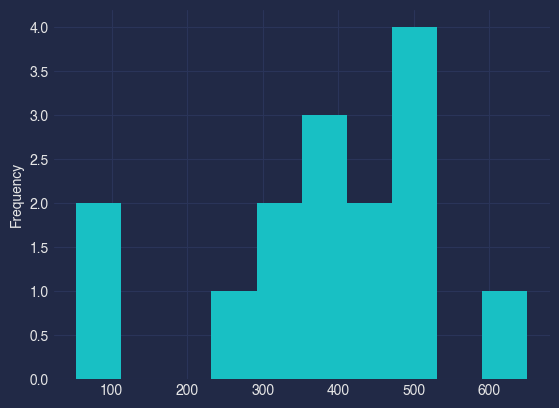

In [26]:
mj_stats['AST'].plot(kind='hist')

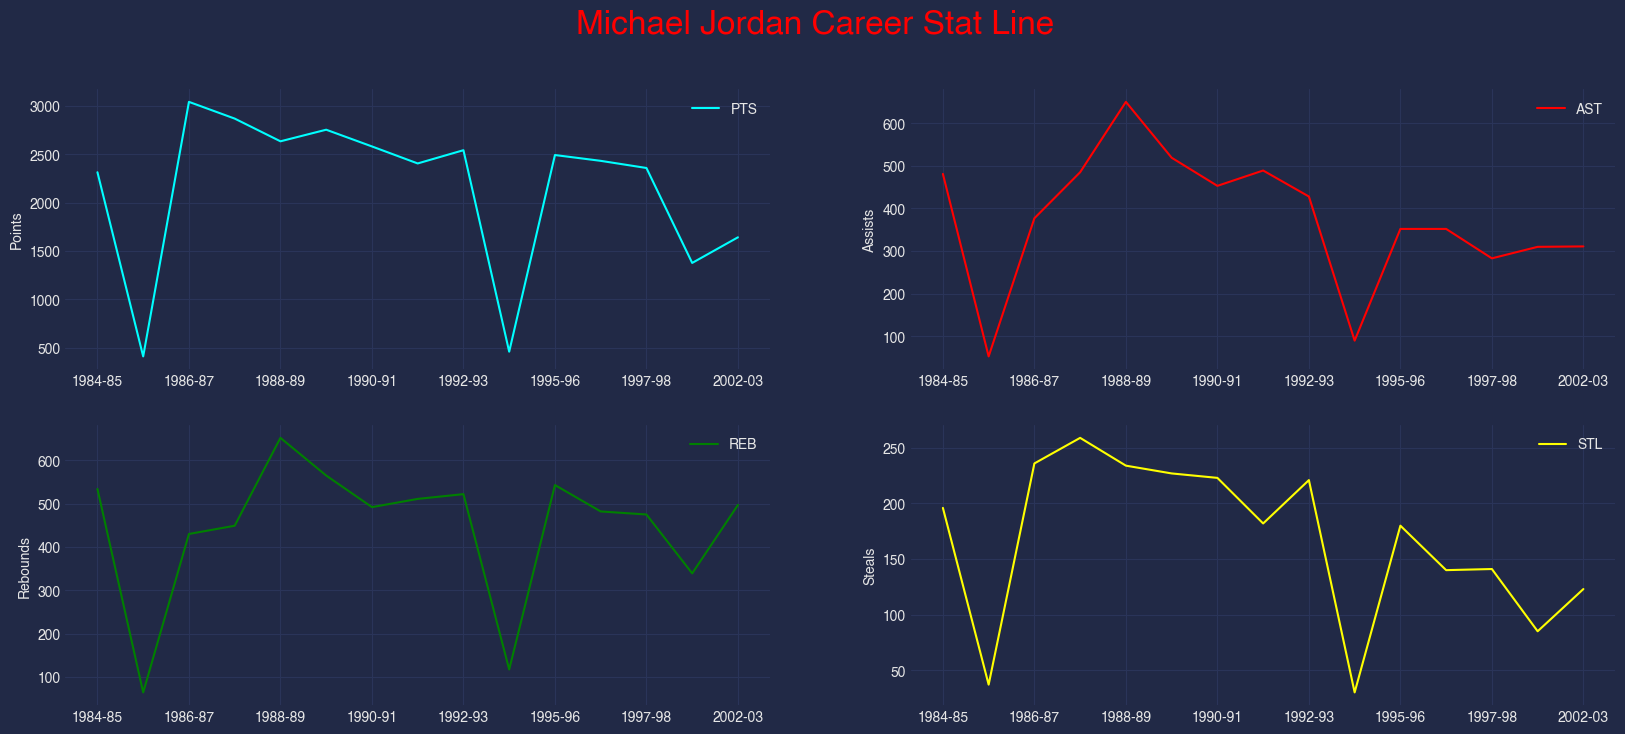

In [27]:
fig = plt.figure() # create figure
fig.suptitle('Michael Jordan Career Stat Line', fontsize=24, color='red')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, forth plot)

# Subplot 1: Line plot
mj_stats[['PTS']].plot(kind='line', color='cyan', figsize=(20, 8), ax=ax0) # add to subplot 1
# ax0.set_title('Michael Jordan Points')
# ax0.set_xlabel('Season')
ax0.set_ylabel('Points')

# Subplot 2: Line plot
mj_stats[['AST']].plot(kind='line', color='red', figsize=(20, 8), ax=ax1) # add to subplot 2
# ax1.set_title ('Michael Jordan')
ax1.set_ylabel('Assists')
# ax1.set_xlabel('Season')

# Subplot 1: Line plot
mj_stats[['REB']].plot(kind='line', color='green', figsize=(20, 8), ax=ax2) # add to subplot 1
# ax2.set_title('Michael Jordan Points')
# ax2.set_xlabel('Season')
ax2.set_ylabel('Rebounds')

# Subplot 2: Line plot
mj_stats[['STL']].plot(kind='line', color='yellow', figsize=(20, 8), ax=ax3) # add to subplot 2
# ax3.set_title ('Michael Jordan')
ax3.set_ylabel('Steals')
# ax3.set_xlabel('Season')

plt.show()

In [28]:
lbj = Player('LeBron James')
lbj_stats = lbj.getPlayersStats()
lbj_stats.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,1492,0.417,63,217,0.290,347,460,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,1684,0.472,108,308,0.351,477,636,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,1823,0.480,127,379,0.335,601,814,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,1621,0.476,99,310,0.319,489,701,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,1642,0.484,113,359,0.315,549,771,0.712,133,459,592,539,138,81,255,165,2250


In [29]:
lbj_game = lbj.getPlayerGameLog()
lbj_game.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,2544,0022300776,"FEB 13, 2024",LAL vs. DET,W,31,9,15,0.600,3,6,0.500,4,4,1.000,0,1,1,8,0,0,4,0,25,9,1
1,22023,2544,0022300747,"FEB 09, 2024",LAL vs. NOP,W,38,6,13,0.462,2,2,1.000,7,8,0.875,1,3,4,14,1,1,2,2,21,15,1
2,22023,2544,0022300740,"FEB 08, 2024",LAL vs. DEN,L,35,9,20,0.450,2,6,0.333,5,5,1.000,1,8,9,7,1,1,2,0,25,-6,1
3,22023,2544,0022300713,"FEB 05, 2024",LAL @ CHA,W,40,12,22,0.545,0,5,0.000,2,3,0.667,0,4,4,7,1,1,4,2,26,2,1
4,22023,2544,0022300701,"FEB 03, 2024",LAL @ NYK,W,40,10,19,0.526,2,5,0.400,2,2,1.000,1,4,5,5,2,1,1,1,24,11,1


In [30]:
lbj_game2023 = lbj_game[lbj_game['SEASON_ID'] == '22023']

In [31]:
lbj_game2023.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,2544,0022300776,"FEB 13, 2024",LAL vs. DET,W,31,9,15,0.600,3,6,0.500,4,4,1.000,0,1,1,8,0,0,4,0,25,9,1
1,22023,2544,0022300747,"FEB 09, 2024",LAL vs. NOP,W,38,6,13,0.462,2,2,1.000,7,8,0.875,1,3,4,14,1,1,2,2,21,15,1
2,22023,2544,0022300740,"FEB 08, 2024",LAL vs. DEN,L,35,9,20,0.450,2,6,0.333,5,5,1.000,1,8,9,7,1,1,2,0,25,-6,1
3,22023,2544,0022300713,"FEB 05, 2024",LAL @ CHA,W,40,12,22,0.545,0,5,0.000,2,3,0.667,0,4,4,7,1,1,4,2,26,2,1
4,22023,2544,0022300701,"FEB 03, 2024",LAL @ NYK,W,40,10,19,0.526,2,5,0.400,2,2,1.000,1,4,5,5,2,1,1,1,24,11,1


In [39]:
lbj_wl = lbj_game2023[['SEASON_ID', 'PTS']]

<Axes: >

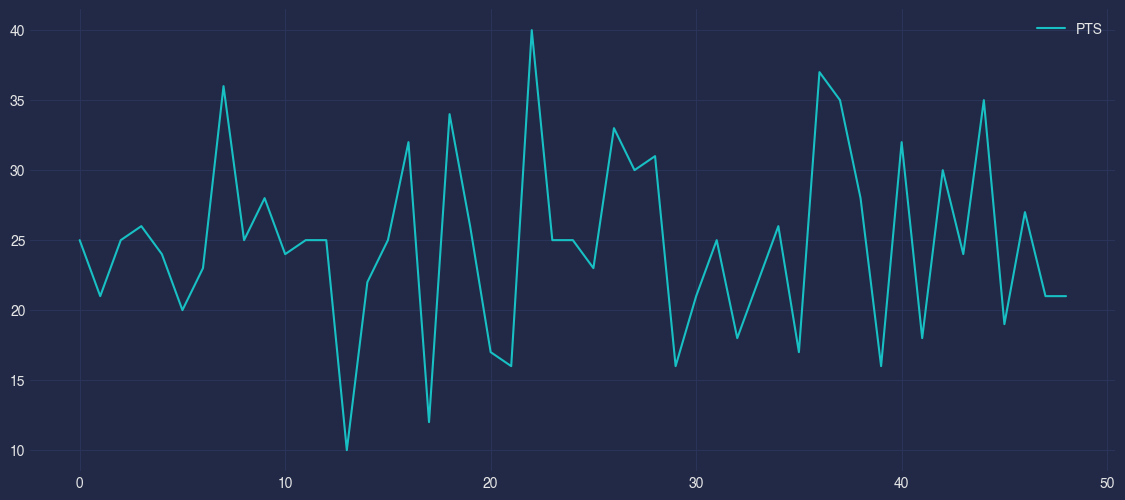

In [47]:
lbj_wl.plot(kind='line', figsize=(14,6))